In [4]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),'..','..','..'))
from ursse.hydra_harp_file_reader import HydraHarpFile
from ursse.LED_tests.data_analyzis import calc_Fano, get_time_window_hist, calc_Fano_from_counts_per_time_window
import numpy as np
import pandas as pd
import seaborn as sns
from ursse.data_processing import \
    get_event_delays, plot_arrival_time_hist, get_events_array, get_fanos, \
    plot_fanos_hist, process_file, read_event_delays, save_event_delays
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import ursse.path_assistant as pa
shift = pa.PathAssistant('shift_03_03_2020')
from config_ursse import get_from_config

In [27]:
time_stamp_file_name = 'capture_loss_of_one_000.ptu'
prog_path = os.path.join(get_from_config("repo_dir"), "ursse_cpp", "hydra_harp", "hydra_harp_reader")
ptu_file_path = shift.get_time_stamp_file_path(time_stamp_file_name)
output_file_path = \
os.path.join(shift.time_stamp_files_folder_path, "cache", time_stamp_file_name[:-3]+"csv")
output_file_path

'/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/URSSE/shifts/shift_03_03_2020/time_stamp_files/cache/capture_loss_of_one_000.csv'

In [28]:
process = os.popen(f'{prog_path} "{ptu_file_path}" "{output_file_path}"')
preprocessed = process.read()
process.close()
preprocessed

'\nPicoQuant Unified TTTR (PTU) Mode File Demo\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n Loading data from /mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/URSSE/shifts/shift_03_03_2020/time_stamp_files/capture_loss_of_one_000.ptu \n\n Writing output to /mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/URSSE/shifts/shift_03_03_2020/time_stamp_files/cache/capture_loss_of_one_000.csv \n'

In [32]:
df0 = pd.read_csv(output_file_path)

In [46]:
df = df0[df0['channel'] == 1].drop(columns=['channel'])

In [47]:
len(df.index)/df['revolution'].iloc[-1]

0.016308459876459968

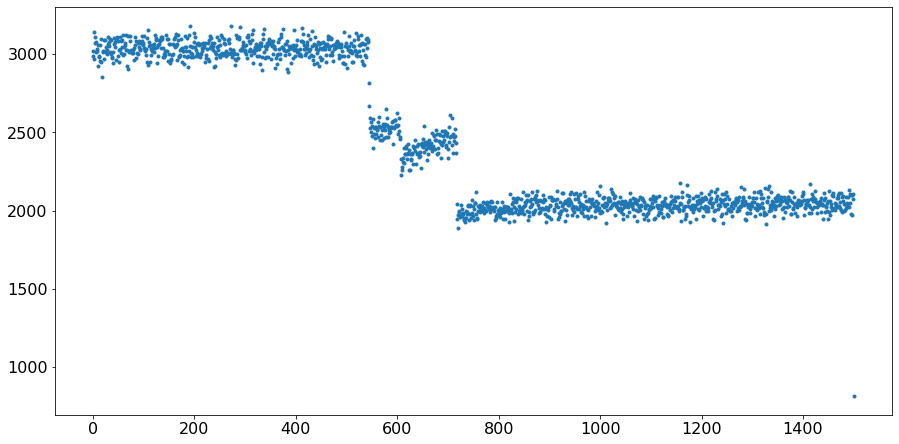

In [50]:
dt_rev = 0.02*7.5e6
res = df.groupby((df['revolution']/dt_rev).astype(int)).apply(lambda x: len(x.index))
plt.plot(res, '.')